In [1]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.datasets import mnist
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

2024-12-11 09:11:26.288496: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-11 09:11:26.295400: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1733904686.303896   15527 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1733904686.306616   15527 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-11 09:11:26.315516: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [ ]:
import os
import shutil
import pathlib

# Ursprünglicher Datenordner
original_dir = pathlib.Path("Data")  # Oberordner der Kategorien
new_base_dir = pathlib.Path("cats_vs_dogs_small")  # Zielbasisordner

def make_subset(subset_name, start_index, end_index):
    # Kategorien (Ordner: Cat und Dog)
    for category in ("Cat", "Dog"):
        # Neues Zielverzeichnis erstellen
        dir = new_base_dir / subset_name / category.lower()  # Kategorienamen in Kleinbuchstaben
        os.makedirs(dir, exist_ok=True)  # Ordner erstellen, falls nicht vorhanden

        # Bilder dieser Kategorie auswählen
        fnames = [f"{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            # Quell- und Zielpfade definieren
            src = original_dir / category / fname
            dst = dir / fname

            # Datei kopieren, wenn sie existiert
            if src.exists():
                shutil.copyfile(src, dst)

# Teilmengen erstellen
make_subset("train", start_index=0, end_index=1000)
make_subset("validation", start_index=1000, end_index=1500)
make_subset("test", start_index=1500, end_index=2500)


## Deep Learning with Python Second Edititon (2021)
---

Kapitel 8: Introduction to deep learning for computer vision

*S. 202* 

Listing 8.1 Instantiating a small convnet



In [ ]:
inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.summary()

*Seite 204*

Listing 8.3 Training the convnet on MNIST images

In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype("float32") / 255
model.compile(optimizer="rmsprop",
loss="sparse_categorical_crossentropy",
metrics=["accuracy"])
model.fit(train_images, train_labels, epochs=5, batch_size=64)


S.204 

Listing 8.4 Evaluating the convnet

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc:.3f}")

*S. 210*


Listing 8.5 An incorrectly structured convnet missing its max-pooling layers

In [ ]:
inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation="softmax")(x)
model_no_max_pool = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model_no_max_pool.summary()

# Dog vs Cats
---

Beispiel Modelle um ein Covnet aufzubauen
---
*S.216*

Listing 8.7 Instantiating a small convnet for dogs vs. cats classification

#### 1 Model: convnet_from_scratch

In [6]:
inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [7]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 87, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 41, 41, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 18, 18, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 9, 9, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 7, 7, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │        12,545 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 991,041 (3.78 MB)

 Trainable params: 991,041 (3.78 MB)

 Non-trainable params: 0 (0.00 B)

Listing 8.8 Configuring the model for training

In [9]:
model.compile(loss="binary_crossentropy",
optimizer="rmsprop",
metrics=["accuracy"])

##### image_dataset_from_directory: 
Ein Aufruf von 
- *image_dataset_from_directory(main_directory, labels='inferred')* 

gibt einen *tf.data.Dataset* zurück, der Stapel von Bildern aus den Unterverzeichnissen *class_a* und *class_b* zusammen mit den Labels 0 und 1 liefert (0 entspricht class_a und 1 entspricht class_b).

- Supported image formats: .jpeg, .jpg, .png, .bmp, .gif. Animated gifs are truncated to the first frame.

Paras:
1. directory: 
- Verzeichnis, in dem sich die Daten befinden. Wenn labels „inferred“ (abgeleitet) ist, sollte es Unterverzeichnisse enthalten, die jeweils Bilder für eine Klasse enthalten. Andernfalls wird die Verzeichnisstruktur ignoriert.

2. labels:
- Entweder „inferred“ (Bezeichnungen werden aus der Verzeichnisstruktur generiert), None (keine Bezeichnungen) oder eine Liste/ein Tupel von ganzzahligen Bezeichnungen, die so groß sind wie die Anzahl der im Verzeichnis gefundenen Bilddateien. Die Bezeichnungen sollten nach der alphanumerischen Reihenfolge der Pfade der Bilddateien sortiert sein (in Python über os.walk(directory) ermittelt).
3. image_size:    
- image_size=(180, 180),  Größe der Bilder, auf die sie beim Laden skaliert werden

4. batch_size:
batch_size=32
Anzahl der Bilder pro Batch



- base_dir / "train", base_dir / "validation", base_dir / "test": Diese Verzeichnisse enthalten die Bilddaten, die für das Training, die Validierung und das Testen des Modells verwendet werden.
- image_size=(180, 180): Jedes Bild wird auf eine Größe von 180x180 Pixeln skaliert, da CNNs eine feste Eingabegröße benötigen. Dies ist die Größe, die das Modell erwartet.
- batch_size=32: Die Daten werden in Batches von je 32 Bildern verarbeitet. Das bedeutet, dass beim Training in jedem Schritt 32 Bilder gleichzeitig verarbeitet werden.
- train_dataset, validation_dataset, test_dataset: Diese Objekte sind TensorFlow Dataset-Objekte, die die entsprechenden Bilddaten und Labels enthalten. Sie sind so strukturiert, dass sie effizient durch die Daten iterieren können, um sie an das Modell zu übergeben.

---
*S. 217*

Listing 8.9 Using image_dataset_from_directory to read images

In [2]:

train_dataset = image_dataset_from_directory(
    "cats_vs_dogs_small/train",
    image_size=(180, 180),
    batch_size=32)
    
validation_dataset = image_dataset_from_directory(
    "cats_vs_dogs_small/validation",
    image_size=(180, 180),
    batch_size=32)

test_dataset = image_dataset_from_directory(
    "cats_vs_dogs_small/test",
    image_size=(180, 180),
    batch_size=32)

Found 1999 files belonging to 2 classes.


I0000 00:00:1733907708.576609   15527 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1106 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4060 Ti, pci bus id: 0000:01:00.0, compute capability: 8.9


Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


- for data_batch, labels_batch in train_dataset:: Diese Schleife iteriert durch den train_dataset, der aus Batches von Bildern und den zugehörigen Labels besteht.

    - In jedem Schritt der Schleife werden ein data_batch (Bilder) und ein labels_batch (Labels) geladen und zur Verfügung gestellt.

- data_batch.shape: Dies gibt die Form des data_batch-Arrays aus. Da die Batch-Größe 32 ist, werden die Daten in einem 4D-Tensor organisiert:

    - (32, 180, 180, 3) bedeutet:
        - 32: Die Batch-Größe (32 Bilder).
        - 180, 180: Die Höhe und Breite der Bilder (180x180 Pixel).
        - 3: Die Anzahl der Farbkanäle (RGB).

- labels_batch.shape: Dies gibt die Form des labels_batch-Arrays aus. Da es sich bei der Klassifikation wahrscheinlich um eine Multiklassen-Aufgabe handelt, ist die Form (32,), was bedeutet, dass jedes der 32 Bilder mit einem entsprechenden Label verknüpft ist.

    - Wenn labels="inferred" verwendet wird, wird davon ausgegangen, dass das Verzeichnis so strukturiert ist, dass die Ordnernamen die Klassennamen oder Labels sind. Zum Beispiel könnte ein Ordner cat für Bilder der Klasse "Katze" und ein Ordner dog für Bilder der Klasse "Hund" stehen.

- break: Der break-Befehl unterbricht die Schleife nach dem ersten Batch. Das bedeutet, dass nur das erste Batch von 32 Bildern und Labels verarbeitet wird und anschließend der Code gestoppt wird. Normalerweise würde die Schleife ohne break durch alle Batches des Datensatzes iterieren.

---
*S. 219*

Listing 8.10 Displaying the shapes of the data and labels yielded by the Dataset

In [3]:
for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break


data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


Callbacks ModelCheckpoint-Callback der dafür sorgt, dass das MOdell während des trainings gespeichert wird, aber nur unter bestimmten bediungen.

1. keras.callbacks.ModelCheckpoint
- ModelCheckpoint ist ein Callback in Keras, das während des Trainings eingesetzt wird, um das Modell nach jedem Trainigsepoch zu speichern. Dieser Callback kann so konfiguriert werden, dass das Modell nur dann gespeichert wird, wenn es eine bestimmte Bedingung erfüllt wird. (z.b wenn sich das Modell verbesser)
- Der Callback wird an die Methode *fit()* des Modells übergeben, und zwar als Teil der Liste von Callbacks, die das Modell während des Trainings anwendet. Das Bedeutet, dass bei jedem Epochenergebnis überprüft wird, ob das Modell gespeichert werden soll.

2. Parameter des ModelCheckpoint-Callbacks
- filepath= "convnet_from_scratch.keras":
    - Dateipfad wo das Modell gespeichert werden soll. Diese Datei enthält **alle** Modellgewichte sowie die Modellarchitektur und kann später für das Laden des Modells verwendet werden.

    - Der Dateiname kann auch die Epochenummer beinhalten "model_epoch_{epoch}.keras"
- save_best_only=True
    - Modelle werden nur gespeichert wenn sich das Modell verbessert. Nur das beste Modell basierend auf dem beobachteten Kriterium wird gespeichert.
    Auf *false* gesetzt wird wprde das Modell nach jeder Epoche gespeichert werden unabhängig davon ob sich die Leistung verbessert hat oder nicht.

- monitor ="val_loss"
    - Überwachung der Metrik die während des Training überwacht werden soll. In unseren Fall die Validierungsdaten *(val_loss)*
    - Das Modell wird nur gespeichert, wenn der val_loss in einer Epoche besser wird als der zuvor beste Wert.
    - Sie können auch andere Metriken überwachen, wie z. B. accuracy oder val_accuracy, je nachdem, welche Metrik für Ihr Modell wichtig ist.


Speicherung des Models

*S. 219*

Listing 8.11 Fitting the model using a Dataset

In [4]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="model/convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
]

In [10]:
with tf.device('/GPU:0'):
    history = model.fit(
    train_dataset,
    epochs=5,
    validation_data=validation_dataset,
    callbacks=callbacks)


Epoch 1/5


I0000 00:00:1733907754.683818   97069 service.cc:148] XLA service 0x7f08b000c2a0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1733907754.683838   97069 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 4060 Ti, Compute Capability 8.9
2024-12-11 10:02:34.696076: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1733907754.778166   97069 cuda_dnn.cc:529] Loaded cuDNN version 90300


 8/63 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.4726 - loss: 0.7548

I0000 00:00:1733907757.113494   97069 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.5010 - loss: 0.7181

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 76ms/step - accuracy: 0.5012 - loss: 0.7181 - val_accuracy: 0.5000 - val_loss: 0.7169
Epoch 2/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5166 - loss: 0.6945

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.5167 - loss: 0.6945 - val_accuracy: 0.5700 - val_loss: 0.6811
Epoch 3/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.5434 - loss: 0.6919 - val_accuracy: 0.5070 - val_loss: 0.6779
Epoch 4/5
 1/63 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.4062 - loss: 0.7045

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.5738 - loss: 0.6957 - val_accuracy: 0.5710 - val_loss: 0.6667
Epoch 5/5


Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.6317 - loss: 0.6413 - val_accuracy: 0.6690 - val_loss: 0.6078


Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


In [10]:
# Anzeigen der verfügbaren Geräte
devices = tf.config.list_physical_devices()
for device in devices:
    print(device)

PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')
PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


*S. 220*

Listing 8.12 Displaying curves of loss and accuracy during training

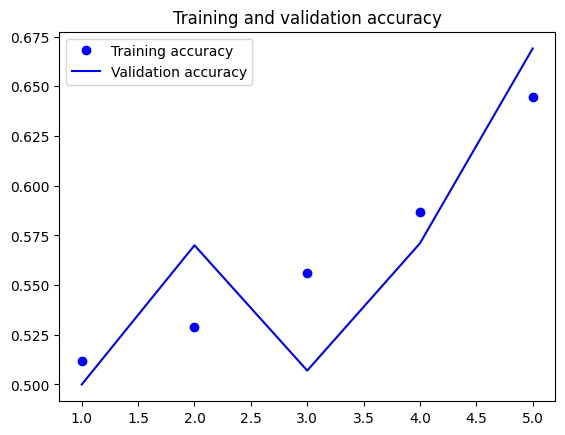

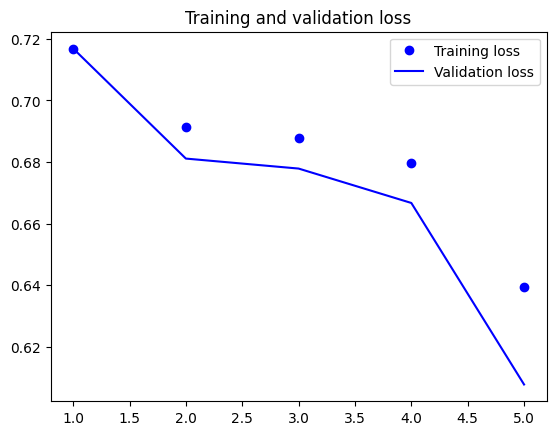

In [12]:
import matplotlib.pyplot as plt

accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)

# Plotting
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

*S. 221* 

Listing 8.13 Evaluating the model on the test set

In [11]:
test_model = keras.models.load_model("model/convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

2024-12-11 10:02:53.846860: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: INVALID_ARGUMENT: Number of channels inherent in the image must be 1, 3 or 4, was 2
	 [[{{node decode_image/DecodeImage}}]]
	 [[IteratorGetNext]]
2024-12-11 10:02:53.846897: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: INVALID_ARGUMENT: Number of channels inherent in the image must be 1, 3 or 4, was 2
	 [[{{node decode_image/DecodeImage}}]]
	 [[IteratorGetNext]]
	 [[IteratorGetNext/_2]]
2024-12-11 10:02:53.846909: I tensorflow/core/framework/local_rendezvous.cc:424] Local rendezvous recv item cancelled. Key hash: 18112791768931240919
2024-12-11 10:02:53.846923: I tensorflow/core/framework/local_rendezvous.cc:424] Local rendezvous recv item cancelled. Key hash: 9444383977376332996


InvalidArgumentError: Graph execution error:

Detected at node decode_image/DecodeImage defined at (most recent call last):
<stack traces unavailable>
Detected at node decode_image/DecodeImage defined at (most recent call last):
<stack traces unavailable>
2 root error(s) found.
  (0) INVALID_ARGUMENT:  Number of channels inherent in the image must be 1, 3 or 4, was 2
	 [[{{node decode_image/DecodeImage}}]]
	 [[IteratorGetNext]]
	 [[IteratorGetNext/_2]]
  (1) INVALID_ARGUMENT:  Number of channels inherent in the image must be 1, 3 or 4, was 2
	 [[{{node decode_image/DecodeImage}}]]
	 [[IteratorGetNext]]
0 successful operations.
0 derived errors ignored. [Op:__inference_multi_step_on_iterator_6542]

##### **Test accuracy von 0.693**

Der **data_augmentation-Block** erstellt eine Pipeline für die Bildaugmentation, bei der:

Zufällige horizontale Spiegelungen durchgeführt werden.
Zufällige Rotationen von Bildern im Bereich von -10 bis +10 Grad angewendet werden.
Zufälliger Zoom von bis zu 20% durchgeführt wird.

Das hilft, das Modell robuster gegen verschiedene Bildorientierungen zu machen und verhindert, dass das Modell nur spezifische Ausrichtungen von Objekten erkennt.

*S.221*
Listing 8.14 Define a data augmentation stage to add to an image model

In [13]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

*S. 222*

Listing 8.15 Displaying some randomly augmented training images

2024-12-10 18:07:23.549360: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


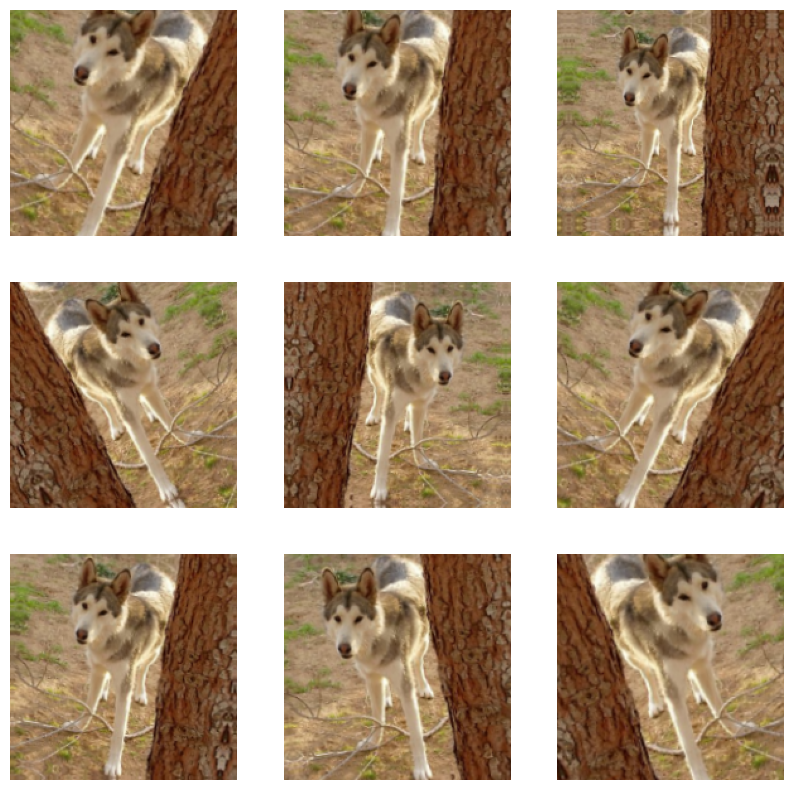

In [14]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1): #welches bild
    for i in range(9): # bilder anzahl
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1) # wie viele plots
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

binäre Klassifikationsaufgabe eines CNN Models:
- **Input 180 x 180 x 3 Farbkanäle RGB**
- **data_augmentation(inputs)** Transormierten bilder mit den bilder inputs gespiegelt, Rotationen und Zoom.
- **Reskalierung: (x = layers.Rescaling(1./255)(x))**
Die Reskalierung sorgt dafür, dass die Pixelwerte der Bilder von einem Bereich von [0, 255] (die typischen Farbwerte von Bildern) auf [0, 1] skaliert werden.
Dies ist wichtig, weil es den Lernprozess stabiler macht und das Modell schneller konvergieren kann, da viele neuronale Netzwerke besser mit kleineren Eingabewerten arbeiten.

- **Konvolutionale Schichten (Conv2D)**
    - Jede Conv2D-Schicht hat eine bestimmte Anzahl von Filtern (oder Kernels) und eine Kernelgröße (hier 3x3). Diese Filter werden über das Bild geschoben, um lokale Merkmale wie Kanten, Ecken oder Texturen zu extrahieren.
    -Die Anzahl der Filter wächst mit den Schichten (32, 64, 128, 256), was darauf hindeutet, dass das Modell zunehmend komplexere Merkmale erlernt, je weiter es in der Tiefe geht.
    - activation="relu" bedeutet, dass die ReLU-Aktivierungsfunktion auf die Ausgaben jeder Convolutional-Schicht angewendet wird. ReLU hilft, Nichtlinearitäten in das Modell einzuführen, wodurch es leistungsfähiger wird.

- Max-Pooling-Schichten (MaxPooling2D): Nach jeder Convolutional-Schicht folgt eine Max-Pooling-Schicht, die die Dimensionen der Feature-Maps reduziert.
- Der Parameter pool_size=2 bedeutet, dass der Pooling-Bereich 2x2 ist. Max-Pooling extrahiert das Maximum aus einem 2x2 Bereich der Feature-Map, was zu einer Reduzierung der Größe und einer Verdichtung der Informationen führt.
- Dies hilft, die Rechenleistung zu reduzieren und das Modell robuster gegenüber kleinen Verschiebungen im Bild zu machen.

- **Flatten**
- Flatten() wird verwendet, um die mehrdimensionalen Ausgaben der letzten Konvolutional- und Pooling-Schicht in einen flachen Vektor umzuwandeln.
- Dies ist notwendig, da die nachfolgende dichte Schicht (Dense) nur mit Vektoren arbeitet (nicht mit mehrdimensionalen Tensoren).

Dropout-Sicht (Dropout=0.50)
- Regulierungstechnik um Overfitting zu verhindern.
- Während des Trainings zufällig 50 % der Neuronen in dieser Sicht deaktivert (auf Null gesetzt)
- Dies zwingt das Modell, robustere Merkmale zu lernen, da es nicht auf bestimmte Neuronen angewiesen ist.

- Ausgabeschicht (Dense)
- Dense(1, activation="sigmoid") definiert eine dichte Schicht mit nur einem Neuron und der Sigmoid-Aktivierungsfunktion.
- Da es sich um ein binäres Klassifikationsproblem handelt, gibt die 
    - Sigmoid-Funktion eine Wahrscheinlichkeit zwischen 0 und 1 zurück, die angibt, ob das Bild der Klasse 1 oder Klasse 0 zugeordnet werden soll.


In [15]:
import tensorflow as tf

# Modell laden
model_path = r"model/convnet_from_scratch.keras"
convnet_from_scratch = tf.keras.models.load_model(model_path)

# Modell Zusammenfassung anzeigen
convnet_from_scratch.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 87, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 41, 41, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 18, 18, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 9, 9, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 7, 7, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │        12,545 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,982,084 (7.56 MB)

 Trainable params: 991,041 (3.78 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 991,043 (3.78 MB)

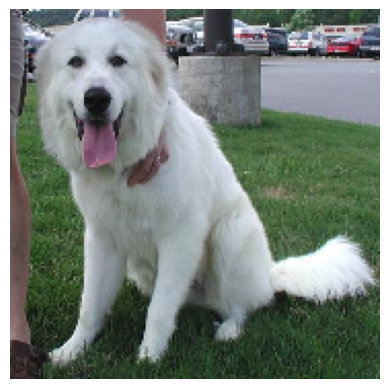

In [16]:
# Model nutzen
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Bild laden
image_path = r"cats_vs_dogs_small/test/dog/1504.jpg"

# Bild auf die gewünschte Eingabegröße skalieren unsere Modell nimmt 180 x 180 x3
img = image.load_img(image_path, target_size=(180, 180))

# Bild anzeigen
plt.imshow(img)
plt.axis("off")
plt.show()


In [17]:
# Das Bild in ein NumPy-Array umwandeln
img_array = image.img_to_array(img)
# Das Bild auf die Batch-Dimension erweitern (Modell erwartet eine Batch von Bildern)
img_array = np.expand_dims(img_array, axis=0)
print(img_array.shape)


(1, 180, 180, 3)


In [18]:
# Vorhersage mit dem geladenen Modell
prediction = convnet_from_scratch.predict(img_array)

# Vorhersage auswerten
# Da es eine binäre Klassifikation (Hund vs. Katze) ist:
if prediction[0] > 0.5:
    print("Das Bild zeigt einen Hund.")
else:
    print("Das Bild zeigt eine Katze.")

# Ausgabe der Vorhersagewahrscheinlichkeit
print("Vorhersagewahrscheinlichkeit für Hund:", prediction)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
Das Bild zeigt einen Hund.
Vorhersagewahrscheinlichkeit für Hund: [[0.5629661]]


---
*S.223*

Listing 8.16 Defining a new convnet that includes image augmentation and dropout

#### 2 Model: convnet_from_scratch_with_augmentation

Modell erstellen

In [19]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(loss="binary_crossentropy",
optimizer="rmsprop",
metrics=["accuracy"])

In [20]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
    filepath="model/convnet_from_scratch_with_augmentation.keras",
    save_best_only=True,
    monitor="val_loss")
]
with tf.device('/GPU:0'):
    history = model.fit(
        train_dataset,
        epochs=100,
        validation_data=validation_dataset,
        callbacks=callbacks)

Epoch 1/100
 8/63 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.4980 - loss: 0.6966

2024-12-10 18:07:56.002251: W external/local_xla/xla/tsl/framework/bfc_allocator.cc:306] Allocator (GPU_0_bfc) ran out of memory trying to allocate 704.14MiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - accuracy: 0.5123 - loss: 0.7063 - val_accuracy: 0.6012 - val_loss: 0.6893
Epoch 2/100


Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.5532 - loss: 0.6915 - val_accuracy: 0.5035 - val_loss: 0.7143
Epoch 3/100
 1/63 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.5000 - loss: 0.7316

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.5865 - loss: 0.6759 - val_accuracy: 0.5368 - val_loss: 0.6873
Epoch 4/100


Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.6209 - loss: 0.6517 - val_accuracy: 0.5921 - val_loss: 0.6516
Epoch 5/100
 4/63 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.5527 - loss: 0.6792

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.6558 - loss: 0.6323 - val_accuracy: 0.6274 - val_loss: 0.6647
Epoch 6/100
 1/63 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.5938 - loss: 0.7236

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.6375 - loss: 0.6478 - val_accuracy: 0.6475 - val_loss: 0.6182
Epoch 7/100


Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.6910 - loss: 0.6154 - val_accuracy: 0.6647 - val_loss: 0.6098
Epoch 8/100
 1/63 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.6875 - loss: 0.5811

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.7088 - loss: 0.5764 - val_accuracy: 0.6677 - val_loss: 0.6113
Epoch 9/100
 1/63 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - accuracy: 0.6562 - loss: 0.6633

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.6702 - loss: 0.5993 - val_accuracy: 0.5549 - val_loss: 0.7989
Epoch 10/100
 1/63 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.5625 - loss: 0.7326

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.6777 - loss: 0.6093 - val_accuracy: 0.6636 - val_loss: 0.6060
Epoch 11/100
 1/63 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.7812 - loss: 0.5488

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.7187 - loss: 0.5585 - val_accuracy: 0.6667 - val_loss: 0.7404
Epoch 12/100
 4/63 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.6159 - loss: 0.6498

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.7008 - loss: 0.5763 - val_accuracy: 0.6858 - val_loss: 0.6440
Epoch 13/100
 1/63 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.8438 - loss: 0.3868

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.7233 - loss: 0.5555 - val_accuracy: 0.7140 - val_loss: 0.5595
Epoch 14/100
 1/63 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.6250 - loss: 0.6758

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.7257 - loss: 0.5508 - val_accuracy: 0.6022 - val_loss: 0.7647
Epoch 15/100
 1/63 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.5000 - loss: 0.8818

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.7146 - loss: 0.5542 - val_accuracy: 0.6949 - val_loss: 0.5927
Epoch 16/100
 1/63 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.6562 - loss: 0.5856

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.7286 - loss: 0.5399 - val_accuracy: 0.7029 - val_loss: 0.6309
Epoch 17/100
 1/63 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.7500 - loss: 0.4904

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.7514 - loss: 0.5088 - val_accuracy: 0.5488 - val_loss: 1.7080
Epoch 18/100
 1/63 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.5938 - loss: 1.8274

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.7620 - loss: 0.5832 - val_accuracy: 0.7432 - val_loss: 0.5325
Epoch 19/100
 1/63 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.7188 - loss: 0.6198

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.7305 - loss: 0.5177 - val_accuracy: 0.7170 - val_loss: 0.5596
Epoch 20/100
 4/63 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.6400 - loss: 0.5838

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.7495 - loss: 0.5119 - val_accuracy: 0.7251 - val_loss: 0.5382
Epoch 21/100
 1/63 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.8438 - loss: 0.4174

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.7856 - loss: 0.4630 - val_accuracy: 0.7694 - val_loss: 0.4819
Epoch 22/100
 1/63 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.7812 - loss: 0.5262

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.7757 - loss: 0.4697 - val_accuracy: 0.7341 - val_loss: 0.6172
Epoch 23/100
 4/63 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.7799 - loss: 0.5408

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.7755 - loss: 0.4762 - val_accuracy: 0.7563 - val_loss: 0.5330
Epoch 24/100
 3/63 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.7778 - loss: 0.4393

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.7729 - loss: 0.4705 - val_accuracy: 0.6526 - val_loss: 0.7088
Epoch 25/100
 1/63 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - accuracy: 0.7188 - loss: 0.5920

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.7779 - loss: 0.4702 - val_accuracy: 0.7251 - val_loss: 0.6104
Epoch 26/100
 1/63 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.7500 - loss: 0.4429

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.7979 - loss: 0.4260 - val_accuracy: 0.7482 - val_loss: 0.5450
Epoch 27/100
 3/63 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.7292 - loss: 0.5423

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.7866 - loss: 0.4573 - val_accuracy: 0.7895 - val_loss: 0.4793
Epoch 28/100
 1/63 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.8438 - loss: 0.4009

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.8137 - loss: 0.4160 - val_accuracy: 0.7633 - val_loss: 0.5060
Epoch 29/100
 1/63 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.7188 - loss: 0.6354

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.8218 - loss: 0.4178 - val_accuracy: 0.7644 - val_loss: 0.5890
Epoch 30/100
 1/63 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.7188 - loss: 0.4621

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.7974 - loss: 0.4034 - val_accuracy: 0.7815 - val_loss: 0.4817
Epoch 31/100
 3/63 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.8993 - loss: 0.4435

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.8418 - loss: 0.4066 - val_accuracy: 0.6918 - val_loss: 0.6372
Epoch 32/100
 3/63 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.7309 - loss: 0.6073

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.8259 - loss: 0.3860 - val_accuracy: 0.7795 - val_loss: 0.4804
Epoch 33/100
 1/63 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.8438 - loss: 0.3155

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.8313 - loss: 0.3561 - val_accuracy: 0.7281 - val_loss: 0.5530
Epoch 34/100
 1/63 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.7812 - loss: 0.3563

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.8435 - loss: 0.3587 - val_accuracy: 0.7694 - val_loss: 0.5411
Epoch 35/100
 4/63 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.8268 - loss: 0.4927

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.8312 - loss: 0.3971 - val_accuracy: 0.7664 - val_loss: 0.5246
Epoch 36/100
 4/63 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.7930 - loss: 0.4276

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.8327 - loss: 0.3656 - val_accuracy: 0.7261 - val_loss: 0.7440
Epoch 37/100
 3/63 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.8038 - loss: 0.5488

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.8328 - loss: 0.4028 - val_accuracy: 0.6989 - val_loss: 0.6255
Epoch 38/100
 4/63 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.7012 - loss: 0.5289

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.8336 - loss: 0.3782 - val_accuracy: 0.7543 - val_loss: 0.8237
Epoch 39/100
 1/63 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.7500 - loss: 0.4887

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.8560 - loss: 0.3216 - val_accuracy: 0.7130 - val_loss: 0.6571
Epoch 40/100
 4/63 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.8184 - loss: 0.4317

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.8527 - loss: 0.3516 - val_accuracy: 0.7492 - val_loss: 0.6367
Epoch 41/100
 4/63 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.7930 - loss: 0.4833

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.8457 - loss: 0.3438 - val_accuracy: 0.7865 - val_loss: 0.5724
Epoch 42/100
 4/63 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.8171 - loss: 0.4199

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.8590 - loss: 0.3537 - val_accuracy: 0.7674 - val_loss: 0.7116
Epoch 43/100
 1/63 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.7812 - loss: 0.4336

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.8431 - loss: 0.3514 - val_accuracy: 0.8228 - val_loss: 0.4693
Epoch 44/100
 1/63 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.8125 - loss: 0.4318

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.8404 - loss: 0.3318 - val_accuracy: 0.8097 - val_loss: 0.5307
Epoch 45/100
 4/63 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.8294 - loss: 0.5074

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.8616 - loss: 0.3355 - val_accuracy: 0.7684 - val_loss: 0.5309
Epoch 46/100
 1/63 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.7812 - loss: 0.3957

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.8685 - loss: 0.3008 - val_accuracy: 0.8207 - val_loss: 0.4294
Epoch 47/100
 1/63 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.8438 - loss: 0.3164

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.8771 - loss: 0.2771 - val_accuracy: 0.7885 - val_loss: 0.7261
Epoch 48/100
 1/63 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.9062 - loss: 0.2320

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.8839 - loss: 0.2871 - val_accuracy: 0.8338 - val_loss: 0.4684
Epoch 49/100
 1/63 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.9062 - loss: 0.1620

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.8851 - loss: 0.2770 - val_accuracy: 0.8228 - val_loss: 0.4998
Epoch 50/100
 1/63 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.9062 - loss: 0.2221

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.8877 - loss: 0.2836 - val_accuracy: 0.7754 - val_loss: 0.6890
Epoch 51/100
 1/63 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.9062 - loss: 0.2637

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.8845 - loss: 0.3101 - val_accuracy: 0.8097 - val_loss: 0.5755
Epoch 52/100
 4/63 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.8340 - loss: 0.3707

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.8906 - loss: 0.2693 - val_accuracy: 0.7795 - val_loss: 0.5257
Epoch 53/100
 1/63 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.8438 - loss: 0.5365

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.8819 - loss: 0.3026 - val_accuracy: 0.7925 - val_loss: 0.6506
Epoch 54/100
 4/63 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.8991 - loss: 0.2555

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.8901 - loss: 0.2799 - val_accuracy: 0.7090 - val_loss: 1.0782
Epoch 55/100
 1/63 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.7812 - loss: 0.9226

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.8959 - loss: 0.2891 - val_accuracy: 0.8228 - val_loss: 0.5455
Epoch 56/100
 4/63 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.8294 - loss: 0.3331

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.8861 - loss: 0.2684 - val_accuracy: 0.7966 - val_loss: 0.8600
Epoch 57/100
 1/63 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - accuracy: 0.9688 - loss: 0.2774

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9043 - loss: 0.2443 - val_accuracy: 0.8207 - val_loss: 0.6212
Epoch 58/100
 4/63 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.8874 - loss: 0.3700

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9031 - loss: 0.2695 - val_accuracy: 0.8288 - val_loss: 0.5748
Epoch 59/100
 1/63 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9375 - loss: 0.1235

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9071 - loss: 0.2368 - val_accuracy: 0.8197 - val_loss: 0.4777
Epoch 60/100
 3/63 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.8837 - loss: 0.2295

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9030 - loss: 0.2426 - val_accuracy: 0.7714 - val_loss: 0.8270
Epoch 61/100
 1/63 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.9375 - loss: 0.1177

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9008 - loss: 0.2497 - val_accuracy: 0.8489 - val_loss: 0.4448
Epoch 62/100
 4/63 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.8398 - loss: 0.3690

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.8887 - loss: 0.2636 - val_accuracy: 0.8338 - val_loss: 0.5157
Epoch 63/100
 4/63 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9375 - loss: 0.1678

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9205 - loss: 0.2126 - val_accuracy: 0.8369 - val_loss: 0.5018
Epoch 64/100
 3/63 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.8993 - loss: 0.2406

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9147 - loss: 0.2302 - val_accuracy: 0.8268 - val_loss: 0.4893
Epoch 65/100


Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9235 - loss: 0.1971 - val_accuracy: 0.8379 - val_loss: 0.4585
Epoch 66/100
 1/63 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9062 - loss: 0.2455

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9129 - loss: 0.2076 - val_accuracy: 0.7825 - val_loss: 0.7682
Epoch 67/100
 1/63 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.8438 - loss: 0.4453

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9107 - loss: 0.2502 - val_accuracy: 0.8409 - val_loss: 0.5336
Epoch 68/100
 4/63 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.8958 - loss: 0.2505

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9160 - loss: 0.2170 - val_accuracy: 0.8510 - val_loss: 0.4912
Epoch 69/100
 3/63 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.8733 - loss: 0.2753

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9155 - loss: 0.2147 - val_accuracy: 0.8117 - val_loss: 0.6453
Epoch 70/100
 6/63 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9263 - loss: 0.1561

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9110 - loss: 0.2133 - val_accuracy: 0.7845 - val_loss: 0.9910
Epoch 71/100
 3/63 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.7917 - loss: 1.0527

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9001 - loss: 0.3043 - val_accuracy: 0.8288 - val_loss: 0.6039
Epoch 72/100
 4/63 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9030 - loss: 0.2435

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9149 - loss: 0.2217 - val_accuracy: 0.7865 - val_loss: 0.7695
Epoch 73/100
 1/63 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9375 - loss: 0.1513

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9269 - loss: 0.1912 - val_accuracy: 0.8268 - val_loss: 0.5169
Epoch 74/100
 1/63 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - accuracy: 0.8750 - loss: 0.2281

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9125 - loss: 0.1981 - val_accuracy: 0.8570 - val_loss: 0.4711
Epoch 75/100
 3/63 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 1.0000 - loss: 0.0442

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9463 - loss: 0.1506 - val_accuracy: 0.8318 - val_loss: 0.7954
Epoch 76/100
 1/63 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - accuracy: 0.9375 - loss: 0.1601

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9225 - loss: 0.2115 - val_accuracy: 0.7875 - val_loss: 0.8516
Epoch 77/100
 1/63 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - accuracy: 1.0000 - loss: 0.0190

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9196 - loss: 0.1992 - val_accuracy: 0.8127 - val_loss: 0.9611
Epoch 78/100
 4/63 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.8542 - loss: 0.4362

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9041 - loss: 0.2461 - val_accuracy: 0.8278 - val_loss: 0.6544
Epoch 79/100
 1/63 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 1.0000 - loss: 0.0632

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9312 - loss: 0.2119 - val_accuracy: 0.8238 - val_loss: 0.6767
Epoch 80/100
 4/63 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9030 - loss: 0.2014

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9274 - loss: 0.2057 - val_accuracy: 0.8359 - val_loss: 0.6219
Epoch 81/100
 1/63 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.9062 - loss: 0.2436

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9362 - loss: 0.1722 - val_accuracy: 0.8258 - val_loss: 0.6687
Epoch 82/100
 1/63 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.8750 - loss: 0.4219

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9364 - loss: 0.1736 - val_accuracy: 0.8187 - val_loss: 0.6766
Epoch 83/100
 1/63 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9062 - loss: 0.3597

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9212 - loss: 0.1980 - val_accuracy: 0.8570 - val_loss: 0.4703
Epoch 84/100
 3/63 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9635 - loss: 0.1434

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9358 - loss: 0.1828 - val_accuracy: 0.8560 - val_loss: 0.5762
Epoch 85/100
 1/63 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.9375 - loss: 0.1102

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9263 - loss: 0.1815 - val_accuracy: 0.8429 - val_loss: 0.6471
Epoch 86/100
 1/63 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9375 - loss: 0.1795

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9298 - loss: 0.1797 - val_accuracy: 0.8268 - val_loss: 0.5192
Epoch 87/100
 4/63 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9622 - loss: 0.0799

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9392 - loss: 0.1581 - val_accuracy: 0.8640 - val_loss: 0.5665
Epoch 88/100
 4/63 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9349 - loss: 0.1869

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9367 - loss: 0.1887 - val_accuracy: 0.7684 - val_loss: 1.3298
Epoch 89/100
 1/63 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9062 - loss: 0.2187

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9314 - loss: 0.1846 - val_accuracy: 0.8479 - val_loss: 0.5291
Epoch 90/100
 4/63 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9141 - loss: 0.1955

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9200 - loss: 0.1919 - val_accuracy: 0.8228 - val_loss: 0.8740
Epoch 91/100
 4/63 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9375 - loss: 0.1967

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9316 - loss: 0.1835 - val_accuracy: 0.8540 - val_loss: 0.4871
Epoch 92/100
 4/63 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9583 - loss: 0.1158

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9476 - loss: 0.1588 - val_accuracy: 0.8207 - val_loss: 0.6664
Epoch 93/100
 4/63 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9245 - loss: 0.2032

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9318 - loss: 0.1841 - val_accuracy: 0.7724 - val_loss: 1.6418
Epoch 94/100
 1/63 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.9062 - loss: 0.5046

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9428 - loss: 0.1711 - val_accuracy: 0.8459 - val_loss: 0.6098
Epoch 95/100
 1/63 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.9375 - loss: 0.1543

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9359 - loss: 0.1655 - val_accuracy: 0.8671 - val_loss: 0.5969
Epoch 96/100
 1/63 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9688 - loss: 0.1786

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9458 - loss: 0.1532 - val_accuracy: 0.8550 - val_loss: 0.4594
Epoch 97/100
 1/63 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - accuracy: 0.9375 - loss: 0.1282

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9446 - loss: 0.1453 - val_accuracy: 0.8510 - val_loss: 0.6632
Epoch 98/100
 6/63 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9065 - loss: 0.2991

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9346 - loss: 0.1915 - val_accuracy: 0.8399 - val_loss: 0.5420
Epoch 99/100
 1/63 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9688 - loss: 0.0845

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9353 - loss: 0.1741 - val_accuracy: 0.8499 - val_loss: 0.7822
Epoch 100/100
 1/63 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9688 - loss: 0.0997

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9473 - loss: 0.1715 - val_accuracy: 0.8419 - val_loss: 0.6782


Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


*S. 223*

Listing 8.17 Training the regularized convnet

*S.224*

Visualisieren und Evaluieren

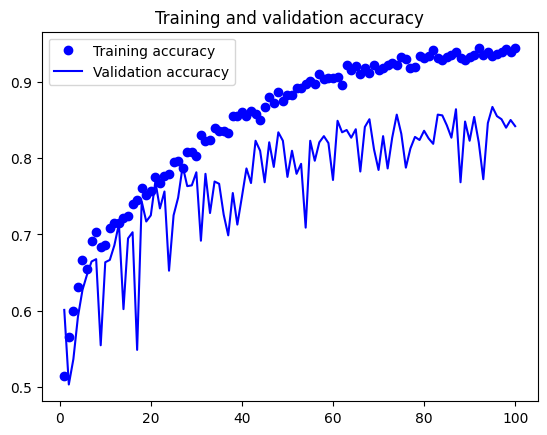

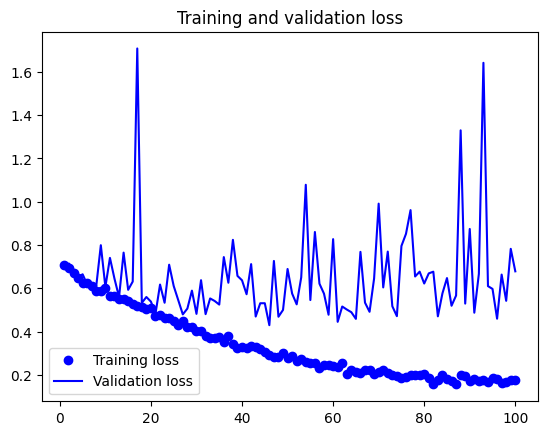

In [21]:
import matplotlib.pyplot as plt

accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)

# Plotting
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()

plt.show()

*S. 224*

Listing 8.18 Evaluating the model on the test set





In [22]:
test_model = keras.models.load_model(
"model/convnet_from_scratch_with_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8418 - loss: 0.4178
Test accuracy: 0.832


Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


"convnet_from_scratch_with_augmentation" **Test accuracy: 0.795**

---

Model einladen: **"convnet_from_scratch_with_augmentation"** und 

##### Vohersagen

In [24]:
import tensorflow as tf

# Modell laden
model_path = r"model/convnet_from_scratch_with_augmentation.keras"
model_convnet_from_scratch_with_augmentation = tf.keras.models.load_model(model_path)

# Modell Zusammenfassung anzeigen
model_convnet_from_scratch_with_augmentation.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential (Sequential)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_1 (Rescaling)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 87, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 41, 41, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 18, 18, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 9, 9, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 7, 7, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │        12,545 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,982,084 (7.56 MB)

 Trainable params: 991,041 (3.78 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 991,043 (3.78 MB)

In [ ]:
# Model nutzen
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Bild laden
image_path = r"cats_and_dogs_small\test\cats\1500.jpg"

# Bild auf die gewünschte Eingabegröße skalieren unsere Modell nimmt 180 x 180 x3
img = image.load_img(image_path, target_size=(180, 180))

# Bild anzeigen (optional)
plt.imshow(img)
plt.axis("off")
plt.show()


In [ ]:
# Das Bild in ein NumPy-Array umwandeln
img_array = image.img_to_array(img)
# Das Bild auf die Batch-Dimension erweitern (Modell erwartet eine Batch von Bildern)
img_array = np.expand_dims(img_array, axis=0)
print(img_array.shape)


In [ ]:
# Vorhersage mit dem geladenen Modell
prediction = model_convnet_from_scratch_with_augmentation.predict(img_array)

# Vorhersage auswerten
# Da es eine binäre Klassifikation (Hund vs. Katze) ist:
if prediction[0] > 0.5:
    print("Das Bild zeigt einen Hund.")
else:
    print("Das Bild zeigt eine Katze.")

# Ausgabe der Vorhersagewahrscheinlichkeit
print("Vorhersagewahrscheinlichkeit für Hund:", prediction[0])


#### 3. Bereits erstelltest Model VGG16 nutzen:
---

Feature extraction consists of using the representations learned by a previously
trained model to extract interesting features from new samples. These features are
then run through a new classifier, which is trained from scratch.
As you saw previously, convnets used for image classification comprise two parts:
they start with a series of pooling and convolution layers, and they end with a densely
connected classifier. The first part is called the convolutional base of the model. In the
case of convnets, feature extraction consists of taking the convolutional base of a previously
trained network, running the new data through it, and training a new classifier
on top of the output.

In [ ]:
conv_base = keras.applications.vgg16.VGG16(
weights="imagenet",
include_top=False,
input_shape=(180, 180, 3))

In [ ]:
conv_base.summary()

In [ ]:
import numpy as np
def get_features_and_labels(dataset):
    all_features = []
    all_labels = []
    for images, labels in dataset:
        preprocessed_images = keras.applications.vgg16.preprocess_input(images)
        features = conv_base.predict(preprocessed_images)
        all_features.append(features)
        all_labels.append(labels)
    return np.concatenate(all_features), np.concatenate(all_labels)
train_features, train_labels = get_features_and_labels(train_dataset)
val_features, val_labels = get_features_and_labels(validation_dataset)
test_features, test_labels = get_features_and_labels(test_dataset)

In [ ]:
inputs = keras.Input(shape=(5, 5, 512))
x = layers.Flatten()(inputs)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)

In [ ]:
model.compile(loss="binary_crossentropy",
optimizer="rmsprop",
metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="model/feature_extraction.keras",
        save_best_only=True,
        monitor="val_loss")
]

history = model.fit(
    train_features, train_labels,
    epochs=20,
    validation_data=(val_features, val_labels),
    callbacks=callbacks
)

In [ ]:
import matplotlib.pyplot as plt
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [ ]:
import tensorflow as tf

# Modell laden
model_path = r"model\feature_extraction.keras"
feature_extraction = tf.keras.models.load_model(model_path)

# Modell Zusammenfassung anzeigen
feature_extraction.summary()

#### MobileNetV2 mit den weights von imagenet

In [ ]:
import imageio.v2 as imageio
from PIL import Image
from keras.applications.mobilenet_v2 import MobileNetV2
import numpy as np
import imageio.v2 as imageio  
from keras.applications.mobilenet_v2 import preprocess_input
from keras.applications.mobilenet_v2 import decode_predictions
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

In [ ]:
MobileNetV2 = MobileNetV2(weights='imagenet')
MobileNetV2

In [ ]:
# Bild laden
image_path = r"shi_zu.jpg"

# Bild auf die gewünschte Eingabegröße skalieren unsere Modell nimmt 180 x 180 x3
img = image.load_img(image_path, target_size=(224, 224))

# Bild anzeigen
plt.imshow(img)
plt.axis("off")
plt.show()


In [ ]:
img = imageio.imread(r'shi_zu.jpg')

# Bild auf die gewünschte Größe (224, 224) skalieren
img_resized = Image.fromarray(img).resize((224, 224))

# Bild in das numpy Array einfügen
data = np.empty((1, 224, 224, 3))
data[0] = np.array(img_resized)

In [ ]:
data = preprocess_input(data)
data.shape

In [ ]:
predictions = MobileNetV2.predict(data)
print('Shape: {}'.format(predictions.shape))

In [ ]:
output_neuron = np.argmax(predictions[0])
print('Most active neuron: {} ({:.2f}%)'.format(
    output_neuron,
    100 * predictions[0][output_neuron]
))


In [ ]:
for name, desc, score in decode_predictions(predictions)[0]:
    print('- {} ({:.2f}%%)'.format(desc, 100 * score))

---
##### Fine tune MobileNetV2

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest',
        validation_split=0.25)

---

### SENET 
Code: https://pytorch.org/hub/pytorch_vision_squeezenet/

In [ ]:
import torch
model = torch.hub.load('pytorch/vision:v0.10.0', 'squeezenet1_0', pretrained=True)
# or
# model = torch.hub.load('pytorch/vision:v0.10.0', 'squeezenet1_1', pretrained=True)
#model.eval()

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
image_path = r"cats_and_dogs_small\test\dogs\1586.jpg"

# Bild auf die gewünschte Eingabegröße skalieren unsere Modell nimmt 180 x 180 x3
img = Image.open(r"cats_and_dogs_small\test\dogs\1586.jpg")

# Bild anzeigen
plt.imshow(img)
plt.axis("off")
plt.show()


#### From dir path

In [ ]:
from PIL import Image
image = Image.open(r"cats_and_dogs_small\test\dogs\1586.jpg")


In [ ]:
# sample execution (requires torchvision)
from PIL import Image
from torchvision import transforms

input_image = Image.open(r"cats_and_dogs_small\test\dogs\1586.jpg")
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
input_tensor = preprocess(input_image)
input_batch = input_tensor.unsqueeze(0) # create a mini-batch as expected by the model

# move the input and model to GPU for speed if available
if torch.cuda.is_available():
    input_batch = input_batch.to('cuda')
    model.to('cuda')

with torch.no_grad():
    output = model(input_batch)
# Tensor of shape 1000, with confidence scores over ImageNet's 1000 classes
print(output[0].shape)
# The output has unnormalized scores. To get probabilities, you can run a softmax on it.
probabilities = torch.nn.functional.softmax(output[0], dim=0)
print(probabilities.shape)

In [ ]:
# Read the categories
with open("imagenet_classes.txt", "r") as f:
    categories = [s.strip() for s in f.readlines()]

In [ ]:
# Show top categories per image
top5_prob, top5_catid = torch.topk(probabilities, 5)
for i in range(top5_prob.size(0)):
    print(categories[top5_catid[i]], top5_prob[i].item())

---

#### From Url example Code

In [ ]:
import urllib
url, filename = ("https://github.com/pytorch/hub/raw/master/images/dog.jpg", "dog.jpg")
try: urllib.URLopener().retrieve(url, filename)
except: urllib.request.urlretrieve(url, filename)

In [ ]:
# sample execution (requires torchvision)
from PIL import Image
from torchvision import transforms

input_image = Image.open(filename)
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
input_tensor = preprocess(input_image)
input_batch = input_tensor.unsqueeze(0) # create a mini-batch as expected by the model

# move the input and model to GPU for speed if available
if torch.cuda.is_available():
    input_batch = input_batch.to('cuda')
    model.to('cuda')

with torch.no_grad():
    output = model(input_batch)
# Tensor of shape 1000, with confidence scores over ImageNet's 1000 classes
print(output[0].shape)
# The output has unnormalized scores. To get probabilities, you can run a softmax on it.
probabilities = torch.nn.functional.softmax(output[0], dim=0)
print(probabilities.shape)

In [ ]:
# Read the categories

with open("imagenet_classes.txt", "r") as f:
    categories = [s.strip() for s in f.readlines()]

In [ ]:
# Show top categories per image
top5_prob, top5_catid = torch.topk(probabilities, 5)
for i in range(top5_prob.size(0)):
    print(categories[top5_catid[i]], top5_prob[i].item())

Fine tune SENET

In [ ]:
import torch
import torch.nn as nn

# Lade das vortrainierte SqueezeNet-Modell
model = torch.hub.load('pytorch/vision:v0.10.0', 'squeezenet1_0', pretrained=True)

# Behalte das Basis-Modell bei
base_model = model.features  # Das ist die 'Feature'-Extraktionseinheit

# Füge neue Schichten für die Klassifikation hinzu
num_classes = 5  # Anzahl der Klassen in deinem Datensatz

# Neue Klassifikationsschicht
new_classifier = nn.Sequential(
    nn.AdaptiveAvgPool2d(1),  # Reduziert die Ausgabedimensionen auf 1x1
    nn.Flatten(),  # Wandelt die 2D-Ausgabe in einen 1D-Vektor um
    nn.Linear(512, num_classes)  # Die letzte Schicht für die Klassifikation
)

# Kombiniere das Basis-Modell mit der neuen Klassifikationsschicht
model = nn.Sequential(
    base_model,
    new_classifier
)

# Initialisiere das Modell für das Training
model.train()

# Definiere den Optimierer und die Verlustfunktion
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

# Beispiel für einen Trainingsloop
num_epochs = 5
for epoch in range(num_epochs):
    for inputs, labels in dataloader:  # Angenommen, du hast einen DataLoader `dataloader`
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item()}')


### Transformer:

In [ ]:
# Transformers ViT

In [ ]:
from transformers import ViTImageProcessor, ViTForImageClassification
from PIL import Image
import requests

url = 'http://images.cocodataset.org/val2017/000000039769.jpg'
image = Image.open(requests.get(url, stream=True).raw)

processor = ViTImageProcessor.from_pretrained('google/vit-base-patch16-224')
model = ViTForImageClassification.from_pretrained('google/vit-base-patch16-224')

inputs = processor(images=image, return_tensors="pt")
outputs = model(**inputs)
logits = outputs.logits
# model predicts one of the 1000 ImageNet classes
predicted_class_idx = logits.argmax(-1).item()
print("Predicted class:", model.config.id2label[predicted_class_idx])

In [ ]:
from transformers import ViTImageProcessor, ViTForImageClassification
from PIL import Image

# Pfad zum Bild
image_path = r'cats_and_dogs_small\test\dogs\1515.jpg'  # Gib den vollständigen Pfad zum Bild an
image = Image.open(image_path)

# Processor und Modell laden
processor = ViTImageProcessor.from_pretrained('google/vit-base-patch16-224')
model = ViTForImageClassification.from_pretrained('google/vit-base-patch16-224')

# Bild verarbeiten
inputs = processor(images=image, return_tensors="pt")

# Vorhersage machen
outputs = model(**inputs)
logits = outputs.logits

# Die vorhergesagte Klasse bestimmen
predicted_class_idx = logits.argmax(-1).item()

# Vorhersage ausgeben
print("Predicted class:", model.config.id2label[predicted_class_idx])
